# Project 3 - Online Learning Platform EDA
---
##### <u><b>Objective</b> : EDA of courses and popular course on Coursera and Udemy</u>
##### Process : Data Cleaning, EDA, and Visualization

<b>Mini-project by Patcharanat Pattanaporn (ken)</b><br>

Dataset : <br>

Coursera Courses - <i>by Sowmya lyer</i>
* 'Coursera_catalog.csv'<br>
* [Link to Source](https://www.kaggle.com/sowmyaiyer/coursera-courses-and-details)

Udemy Courses - <i>by Keliza Toh</i>
* 'Udemy_Raw.csv'<br>
* [Link to Source](https://www.kaggle.com/kelizatoh/udemy-courses)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
df_Coursera = pd.read_csv('Coursera_catalog.csv')
df_Udemy = pd.read_csv('Udemy_Raw.csv')

---

### Data Cleaning Part

In [3]:
df_Coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                891 non-null    int64 
 1   course_title              891 non-null    object
 2   course_URL                891 non-null    object
 3   course_organization       891 non-null    object
 4   course_Certificate_type   891 non-null    object
 5   course_rating             891 non-null    object
 6   course_difficulty         891 non-null    object
 7   course_students_enrolled  891 non-null    object
 8   course_icon               891 non-null    object
 9   image_name                891 non-null    object
 10  course_skills             891 non-null    object
 11  course_top_instructor     534 non-null    object
 12  sub_course_list           891 non-null    object
dtypes: int64(1), object(12)
memory usage: 90.6+ KB


In [4]:
df_coursera = df_Coursera[['course_title', 'course_organization', 
                'course_Certificate_type', 'course_rating', 
                'course_difficulty', 'course_students_enrolled',
                'course_skills']]
# select only necessary columns

df_coursera.isnull().sum()
# check if null value exists

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
course_skills               0
dtype: int64

In [5]:
df_coursera.loc[df_coursera['course_rating'] == 'None'].shape[0]
# 'None' strings exist in 'course_rating' column

3

In [6]:
df_coursera['course_rating'] = df_coursera['course_rating'].replace('None', '0')
df_coursera['course_rating'] = df_coursera['course_rating'].astype(float)
df_coursera['course_rating'].dtypes
# change 'None' to 0, then convert string type to float type

dtype('float64')

In [7]:
df_coursera.loc[df_coursera['course_students_enrolled'] == 'None'].shape[0]
# string 'None' is also exists in column 'course_students_enrolled'

9

In [8]:
df_coursera['course_students_enrolled'] = df_coursera['course_students_enrolled'].replace('None', '0')
# change 'None' to string '0' (In next step, I will use for loop in string, so convert it to string '0' that next step won't cause an error)

In [9]:
df_coursera['course_students_enrolled'].dtypes
# number of student are string(object) type (also include 'k', and 'm')

dtype('O')

In [10]:
for i, data in df_coursera.iterrows() :
    if 'k' in data['course_students_enrolled'] :
        df_coursera.loc[i, 'course_students_enrolled'] = float(data['course_students_enrolled'].replace('k', ''))*1_000
    elif 'm' in data['course_students_enrolled'] :
        df_coursera.loc[i, 'course_students_enrolled'] = float(data['course_students_enrolled'].replace('m', ''))*1_000_000
# replace 'k' with 1_000, and 'm' with 1_000_000

df_coursera

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_skills
0,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,610000.0,"['Binary Code', 'Customer Support', 'Linux', '..."
1,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,640000.0,"['Data Science', 'Statistical Analysis', 'Mach..."
2,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,410000.0,"['Data Science', 'Relational Database Manageme..."
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,2000000.0,"['Json', 'Xml', 'Python Programming', 'Databas..."
4,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,890000.0,"['Tensorflow', 'Convolutional Neural Network',..."
...,...,...,...,...,...,...,...
886,Nanotechnology: A Maker’s Course,Duke University,COURSE,4.8,Mixed,33000.0,[]
887,Building Cloud Services with the Java Spring F...,Vanderbilt University,COURSE,4.3,Intermediate,16000.0,"['Hypertext Transfer Protocol (HTTP)', 'Servle..."
888,Atención Primaria en Salud: El desafío de las ...,Pontificia Universidad Católica de Chile,COURSE,4.8,Intermediate,41000.0,[]
889,Dairy Production and Management,The Pennsylvania State University,COURSE,4.8,Mixed,29000.0,"['Disease Control', 'Animal', 'Nutrition', 'Ge..."


In [11]:
df_coursera['course_students_enrolled'] = df_coursera['course_students_enrolled'].astype(float)
# convert values to float type

df_coursera = df_coursera.rename(columns={'course_students_enrolled':'students'})
# rename column for easier indexing

df_coursera

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students,course_skills
0,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,610000.0,"['Binary Code', 'Customer Support', 'Linux', '..."
1,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,640000.0,"['Data Science', 'Statistical Analysis', 'Mach..."
2,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,410000.0,"['Data Science', 'Relational Database Manageme..."
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,2000000.0,"['Json', 'Xml', 'Python Programming', 'Databas..."
4,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,890000.0,"['Tensorflow', 'Convolutional Neural Network',..."
...,...,...,...,...,...,...,...
886,Nanotechnology: A Maker’s Course,Duke University,COURSE,4.8,Mixed,33000.0,[]
887,Building Cloud Services with the Java Spring F...,Vanderbilt University,COURSE,4.3,Intermediate,16000.0,"['Hypertext Transfer Protocol (HTTP)', 'Servle..."
888,Atención Primaria en Salud: El desafío de las ...,Pontificia Universidad Católica de Chile,COURSE,4.8,Intermediate,41000.0,[]
889,Dairy Production and Management,The Pennsylvania State University,COURSE,4.8,Mixed,29000.0,"['Disease Control', 'Animal', 'Nutrition', 'Ge..."


In [12]:
type(df_coursera['course_skills'][0])
# elements in column 'course_skills' should be list type as it represent.

str

In [13]:
df_coursera['course_skills'] = pd.Series([sublist[1:-1].split(', ') for sublist in df_coursera.course_skills]) 
# convert string items in column 'course_skills' to list type
# by duplicating element, then substitute it in DataFrame
df_coursera['course_skills']

0      ['Binary Code', 'Customer Support', 'Linux', '...
1      ['Data Science', 'Statistical Analysis', 'Mach...
2      ['Data Science', 'Relational Database Manageme...
3      ['Json', 'Xml', 'Python Programming', 'Databas...
4      ['Tensorflow', 'Convolutional Neural Network',...
                             ...                        
886                                                   []
887    ['Hypertext Transfer Protocol (HTTP)', 'Servle...
888                                                   []
889    ['Disease Control', 'Animal', 'Nutrition', 'Ge...
890                                                   []
Name: course_skills, Length: 891, dtype: object

In [14]:
df_coursera.head() # df_coursera is ready to use

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students,course_skills
0,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,610000.0,"['Binary Code', 'Customer Support', 'Linux', '..."
1,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,640000.0,"['Data Science', 'Statistical Analysis', 'Mach..."
2,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,410000.0,"['Data Science', 'Relational Database Manageme..."
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,2000000.0,"['Json', 'Xml', 'Python Programming', 'Databas..."
4,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,890000.0,"['Tensorflow', 'Convolutional Neural Network',..."


In [15]:
df_Udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16429 entries, 0 to 16428
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  16429 non-null  int64  
 1   ID                          16429 non-null  int64  
 2   Title                       16429 non-null  object 
 3   Overall_Rating              16429 non-null  float64
 4   Best_Rating                 16429 non-null  int64  
 5   Worst_Rating                16429 non-null  float64
 6   No_of_Ratings               16429 non-null  int64  
 7   Category                    16429 non-null  object 
 8   Subcategory                 16429 non-null  object 
 9   Topic                       15009 non-null  object 
 10  Instructor                  16429 non-null  object 
 11  Language                    16429 non-null  object 
 12  SkillsFuture                16429 non-null  bool   
 13  No_of_Practice_Test         164

In [16]:
df_udemy = df_Udemy[['Title', 'Overall_Rating', 'No_of_Ratings', 'Category', 'Subcategory', 
                        'Topic', 'Bestseller', 'Price', 'Discounted_Price']]
# select on;y necessary columns
df_udemy.isnull().sum()
# check if new DataFrame has null value

Title                  0
Overall_Rating         0
No_of_Ratings          0
Category               0
Subcategory            0
Topic               1420
Bestseller             0
Price                  0
Discounted_Price    1286
dtype: int64

In [17]:
df_udemy.head()

,Title,Overall_Rating,No_of_Ratings,Category,Subcategory,Topic,Bestseller,Price,Discounted_Price
0,Complete Hypnotherapy & Hypnosis Certification...,4.7,3524,Lifestyle,Esoteric Practices,Hypnotherapy,Yes,104.98,"{'amount': 26.0, 'currency': 'SGD', 'price_str..."
1,Pinterest Marketing for Wedding Professionals ...,5.0,1,Marketing,Social Media Marketing,Pinterest Marketing,No,29.98,"{'amount': 22.0, 'currency': 'SGD', 'price_str..."
2,Master the Telephone Sales- Cold calling Secrets,4.5,3,Marketing,Product Marketing,Marketing Strategy,No,29.98,"{'amount': 22.0, 'currency': 'SGD', 'price_str..."
3,5 Practical Management concepts you MUST know,5.0,2,Personal Development,Leadership,Management Skills,No,49.98,"{'amount': 22.0, 'currency': 'SGD', 'price_str..."
4,Fermented Foods Mastery,4.5,187,Health & Fitness,Nutrition,Fermented Foods,No,68.98,"{'amount': 24.0, 'currency': 'SGD', 'price_str..."


In [18]:
df_udemy['discount'] = df_udemy.Discounted_Price.str.slice(start=11, stop=15)
df_udemy.drop(['Discounted_Price'], axis=1, inplace=True)
df_udemy['discount'] = df_udemy['discount'].astype(float)
# clean Discount_Price column, in case I have to use it.
df_udemy.head()

,Title,Overall_Rating,No_of_Ratings,Category,Subcategory,Topic,Bestseller,Price,discount
0,Complete Hypnotherapy & Hypnosis Certification...,4.7,3524,Lifestyle,Esoteric Practices,Hypnotherapy,Yes,104.98,26.0
1,Pinterest Marketing for Wedding Professionals ...,5.0,1,Marketing,Social Media Marketing,Pinterest Marketing,No,29.98,22.0
2,Master the Telephone Sales- Cold calling Secrets,4.5,3,Marketing,Product Marketing,Marketing Strategy,No,29.98,22.0
3,5 Practical Management concepts you MUST know,5.0,2,Personal Development,Leadership,Management Skills,No,49.98,22.0
4,Fermented Foods Mastery,4.5,187,Health & Fitness,Nutrition,Fermented Foods,No,68.98,24.0


In [19]:
condition = df_udemy.isnull().any(axis=1)
df_udemy['discount'] = df_udemy['discount'].fillna(0)
df_udemy['discount'].isnull().sum()
# fill na values with 0
# df_udemy is ready to use

0

---

### EDA and Visualization Part

In [20]:
df_coursera.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students,course_skills
0,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,610000.0,"['Binary Code', 'Customer Support', 'Linux', '..."
1,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,640000.0,"['Data Science', 'Statistical Analysis', 'Mach..."
2,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,410000.0,"['Data Science', 'Relational Database Manageme..."
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,2000000.0,"['Json', 'Xml', 'Python Programming', 'Databas..."
4,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,890000.0,"['Tensorflow', 'Convolutional Neural Network',..."


In [21]:
from collections import Counter
from itertools import chain

c = Counter(chain(*df_coursera.course_skills)) 
# thanks to jezrael (stackoverflow: https://stackoverflow.com/questions/48707117/count-of-elements-in-lists-within-pandas-data-frame)
x = pd.Series(c).sort_index().rename_axis('skill').reset_index(name='freq.').sort_values(by='freq.', ascending=False).head(20)
# try to values_counts() for each elements in lists in DataFrame

The first part of Coursera DataFrame, I will show information from 'All courses' on coursera.

Text(0.5, 1.0, 'Top 20 skill course Coursera offered')

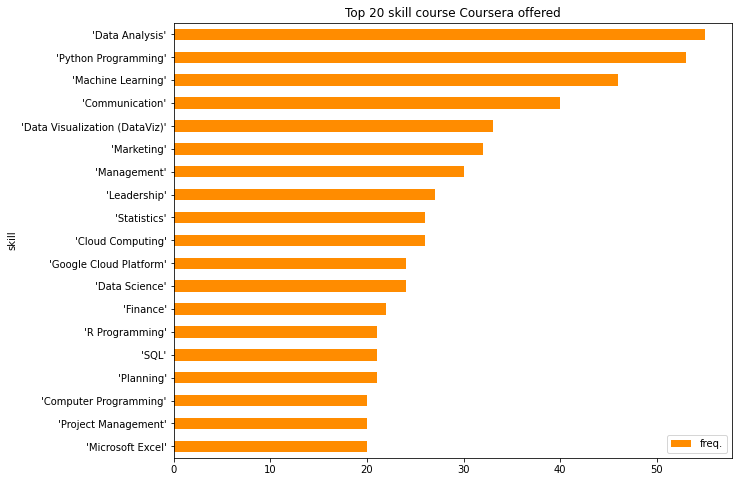

In [22]:
x[1:].sort_values(by='freq.').plot(kind='barh', x='skill', y='freq.', color='darkorange', figsize=(10,8))
plt.title('Top 20 skill course Coursera offered')
# exclude undefined 'NaN' skill by slicing

As you can see in the chart, Coursera mostly offered skills like, Programming, <br>
Business skill, and some General skill (Microsoft Excel, Statistics, Leadershp).

Text(0.5, 1.0, 'Course difficulty on Coursera')

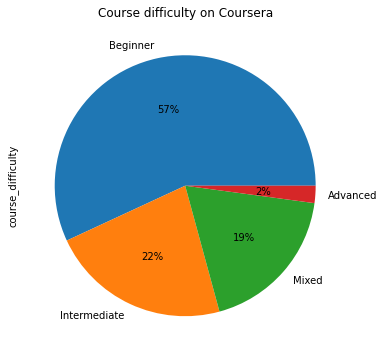

In [23]:
df_coursera['course_difficulty'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(14,6))
plt.title('Course difficulty on Coursera')

Mostly, Beginner courses, barely Advanced courses.

Text(0.5, 1.0, 'Course certificate types on Coursera')

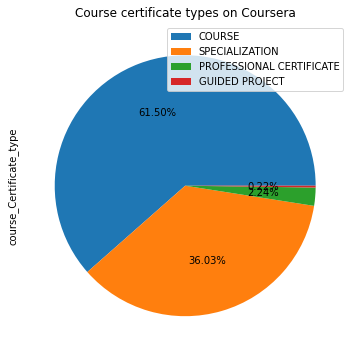

In [43]:
df_coursera['course_Certificate_type'].value_counts().plot(kind='pie', labels=None, legend=True,autopct='%1.2f%%' , figsize=(14,6))
plt.title('Course certificate types on Coursera')

Coursera mostly offered standalone courses and (Specialization) packs of courses.<br>
Only a few are 'Professional Certificate' which give students a certificate after finish the courses

In [40]:
df_coursera.loc[df_coursera['course_rating'] >= 4.8].sort_values(by='students', ascending=False).head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students,course_skills
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3600000.0,"['Logistic Regression', 'Artificial Neural Net..."
12,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,3000000.0,"['Gratitude', 'Happiness', 'Meditation', 'Savo..."
117,Learning How to Learn: Powerful mental tools t...,University of California San Diego,COURSE,4.8,Mixed,2500000.0,"['Test Preparation', 'Learning To Learn', 'Pom..."
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,2000000.0,"['Json', 'Xml', 'Python Programming', 'Databas..."
51,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1800000.0,"['Python Syntax And Semantics', 'Basic Program..."


Preview of good rating courses, sorted by number of student enrolled in courses.

In [41]:
y = df_coursera.loc[df_coursera['students'] >= 300_000].sort_values(by='students', ascending=False)
y.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,students,course_skills
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3600000.0,"['Logistic Regression', 'Artificial Neural Net..."
12,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,3000000.0,"['Gratitude', 'Happiness', 'Meditation', 'Savo..."
117,Learning How to Learn: Powerful mental tools t...,University of California San Diego,COURSE,4.8,Mixed,2500000.0,"['Test Preparation', 'Learning To Learn', 'Pom..."
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,2000000.0,"['Json', 'Xml', 'Python Programming', 'Databas..."
51,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1800000.0,"['Python Syntax And Semantics', 'Basic Program..."


Select only courses having equal or more than 300_000 students enrolled as variable 'y'. And I will call it 'popular courses'

In [27]:
d = Counter(chain(*y.course_skills)) 
z = pd.Series(d).sort_index().rename_axis('skill').reset_index(name='frequency').sort_values(by='frequency', ascending=False).head(20)
z

,skill,frequency
256,'Python Programming',15
185,'Machine Learning',10
52,'Cloud Computing',10
127,'Google App Engine (GAE)',9
128,'Google Cloud Platform',9
91,'Debugging',9
129,'Google Compute Engine',9
78,'Data Analysis',8
84,'Data Science',8
94,'Deep Learning',7


Text(0.5, 1.0, 'Top 20 skill course of popular courses on Coursera')

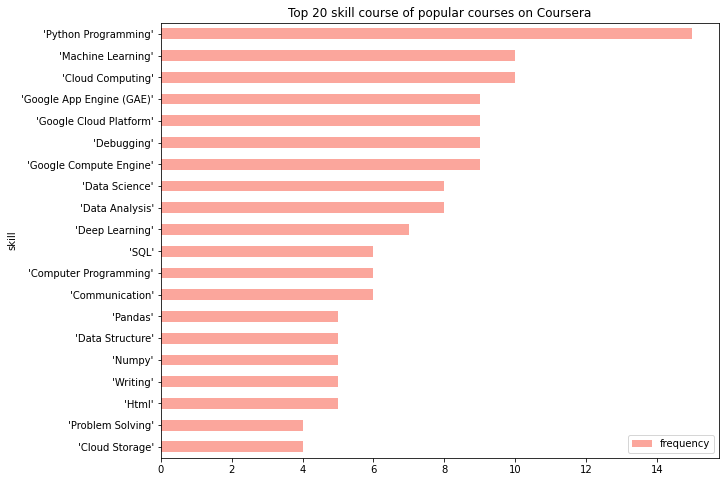

In [28]:
z.sort_values(by='frequency').plot(kind='barh', x='skill', y='frequency', color='salmon',alpha=0.7 , figsize=(10,8))
plt.title('Top 20 skill course of popular courses on Coursera')

Most of 'popular courses' offer only Programing skills, and Software skills.<br>
It means people quite interested Coursera because of these skills.

Text(0.5, 1.0, 'Course difficulty of popular courses on Coursera')

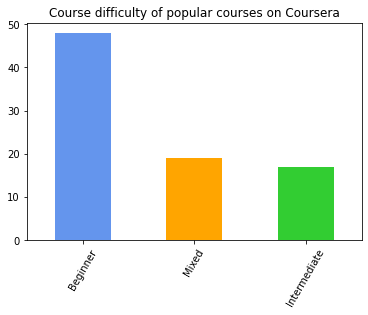

In [29]:
y['course_difficulty'].value_counts().plot(kind='bar', color=['cornflowerblue', 'orange', 'limegreen'])
plt.xticks(rotation=60)
plt.title('Course difficulty of popular courses on Coursera')

And more than the half of 'popular courses' is Beginner course.<br>
We can assume that there's really a lot of people on Coursera are beginner.<br>
> Maybe that if we are online learning provider, we should only focus on creating beginner course, <br>
and only some intermediate course which relating to Programming and Software skills

Text(0.5, 1.0, 'Certificate type of popular courses on Coursera')

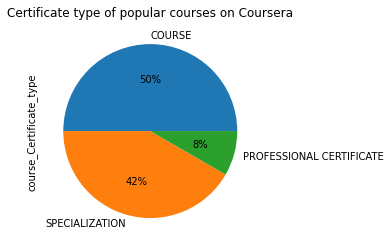

In [30]:
y['course_Certificate_type'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Certificate type of popular courses on Coursera')

From earlier, 'Professional certificate' type is a lot lesser than other type of 'All courses'.<br>
But in 'popular courses', 'Professional certificate' type has more percentage compare to earlier.<br>
> So I assume from data that a lot of learners, most beginner, want something to approve them as 'Professional' after finishing the courses.<br>
(Regular courses also give learners a certificate after finishing the courses)

In [51]:
(y.loc[y['course_Certificate_type'] == 'PROFESSIONAL CERTIFICATE'])['students'].mean()
# Reminder: y stands for popular course

461428.5714285714

In [50]:
(y.loc[y['course_Certificate_type'] != 'PROFESSIONAL CERTIFICATE'])['students'].mean()

608701.2987012987

Not "every learner" in popular courses interested in professional certificate. It's only about 40-60 percent (40 for professional certificate).

---

In [31]:
df_udemy.head()

,Title,Overall_Rating,No_of_Ratings,Category,Subcategory,Topic,Bestseller,Price,discount
0,Complete Hypnotherapy & Hypnosis Certification...,4.7,3524,Lifestyle,Esoteric Practices,Hypnotherapy,Yes,104.98,26.0
1,Pinterest Marketing for Wedding Professionals ...,5.0,1,Marketing,Social Media Marketing,Pinterest Marketing,No,29.98,22.0
2,Master the Telephone Sales- Cold calling Secrets,4.5,3,Marketing,Product Marketing,Marketing Strategy,No,29.98,22.0
3,5 Practical Management concepts you MUST know,5.0,2,Personal Development,Leadership,Management Skills,No,49.98,22.0
4,Fermented Foods Mastery,4.5,187,Health & Fitness,Nutrition,Fermented Foods,No,68.98,24.0


In [44]:
df_udemy.sort_values(by='No_of_Ratings', ascending=False).head(6)


,Title,Overall_Rating,No_of_Ratings,Category,Subcategory,Topic,Bestseller,Price,discount
1249,2021 Complete Python Bootcamp From Zero to Her...,4.6,374285,Development,Programming Languages,Python,Yes,198.98,33.0
6460,Microsoft Excel - Excel from Beginner to Advanced,4.6,240810,Office Productivity,Microsoft,Excel,Yes,128.98,22.0
6575,The Web Developer Bootcamp 2021,4.7,210136,Development,Web Development,NaN,No,128.98,22.0
5645,Angular - The Complete Guide (2021 Edition),4.6,148888,Development,Web Development,Angular,Yes,128.98,22.0
5640,Machine Learning A-Z™: Hands-On Python & R In ...,4.5,148491,Development,Data Science,Python,Yes,128.98,22.0
8148,Java Programming Masterclass covering Java 11 ...,4.6,144174,Development,Programming Languages,Java,Yes,128.98,22.0


Preview of courses sorted by number of ratings.<br>
I refer that the more number of ratings, the more students enrolled in the course.

Text(0.5, 0, 'Number of courses')

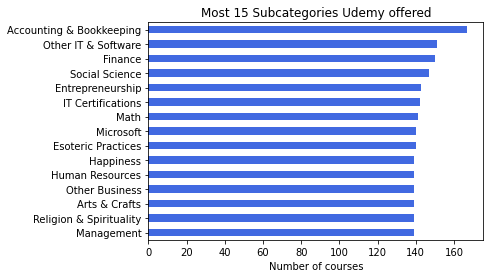

In [33]:
df_udemy['Subcategory'].value_counts(ascending=True).tail(15).plot(kind='barh', color='royalblue')
plt.title('Most 15 Subcategories Udemy offered')
plt.xlabel('Number of courses')
# What courses on Udemy offered

Udemy offered various of skills, so we can't tell which one is the most highlighted. 
> I choose to show Subcategory because, classification of 'Category' column and values in 'Topic' columns are both vague.

In [35]:
a = df_udemy.loc[df_udemy['No_of_Ratings'] >= 25_000]
a.sort_values(by='No_of_Ratings', ascending=False)
# choose only quite popular course (by No_of_Ratings)

,Title,Overall_Rating,No_of_Ratings,Category,Subcategory,Topic,Bestseller,Price,discount
1249,2021 Complete Python Bootcamp From Zero to Her...,4.6,374285,Development,Programming Languages,Python,Yes,198.98,33.0
6460,Microsoft Excel - Excel from Beginner to Advanced,4.6,240810,Office Productivity,Microsoft,Excel,Yes,128.98,22.0
6575,The Web Developer Bootcamp 2021,4.7,210136,Development,Web Development,NaN,No,128.98,22.0
5645,Angular - The Complete Guide (2021 Edition),4.6,148888,Development,Web Development,Angular,Yes,128.98,22.0
5640,Machine Learning A-Z™: Hands-On Python & R In ...,4.5,148491,Development,Data Science,Python,Yes,128.98,22.0
...,...,...,...,...,...,...,...,...,...
11379,Modern JavaScript From The Beginning,4.7,25884,Development,Web Development,JavaScript,No,128.98,22.0
4440,Learn and Understand NodeJS,4.6,25692,Development,Web Development,Node.Js,No,128.98,22.0
14736,Scrum Certification Prep +Scrum Master+ Agile ...,4.4,25635,Development,Software Engineering,Agile,Yes,128.98,18.0
1692,"Machine Learning, Data Science and Deep Learni...",4.6,25469,Development,Data Science,Machine Learning,No,128.98,22.0


Select only courses having equal or more than 25_000 number of ratings as variable 'a'. And I will call it 'popular courses'

Text(0.5, 1.0, 'Top 15 subcategory of popular courses on Udemy')

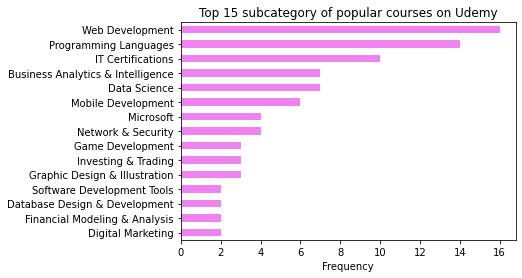

In [36]:
a['Subcategory'].value_counts().head(15).plot(kind='barh', color='violet')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Top 15 subcategory of popular courses on Udemy')

Popular courses (about 100 courses) offered Programming skills, Business skills, IT skills, and some Investment, Graphic design.

In [54]:
ax = df_udemy.loc[df_udemy['Bestseller'] == 'Yes'].sort_values(by='No_of_Ratings', ascending=False).head(20)
ax.head(6)

,Title,Overall_Rating,No_of_Ratings,Category,Subcategory,Topic,Bestseller,Price,discount
1249,2021 Complete Python Bootcamp From Zero to Her...,4.6,374285,Development,Programming Languages,Python,Yes,198.98,33.0
6460,Microsoft Excel - Excel from Beginner to Advanced,4.6,240810,Office Productivity,Microsoft,Excel,Yes,128.98,22.0
5645,Angular - The Complete Guide (2021 Edition),4.6,148888,Development,Web Development,Angular,Yes,128.98,22.0
5640,Machine Learning A-Z™: Hands-On Python & R In ...,4.5,148491,Development,Data Science,Python,Yes,128.98,22.0
8148,Java Programming Masterclass covering Java 11 ...,4.6,144174,Development,Programming Languages,Java,Yes,128.98,22.0
5290,The Complete 2021 Web Development Bootcamp,4.7,141689,Development,Web Development,NaN,Yes,128.98,22.0


'ax' represents Top 20 courses having the most students and tagged 'Bestseller'.

Text(0.5, 1.0, 'Category of Top 20 popular courses on Udemy')

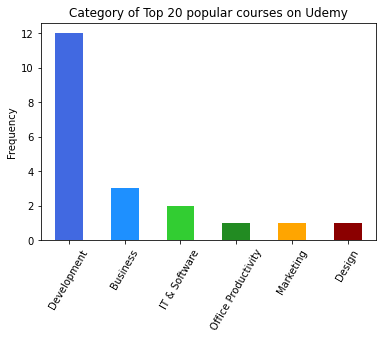

In [38]:
ax['Category'].value_counts().plot(kind='bar', color=['royalblue', 'dodgerblue', 'limegreen', 'forestgreen', 'orange', 'darkred'])
plt.xticks(rotation=60)
plt.ylabel('Frequency')
plt.title('Category of Top 20 popular courses on Udemy')

Most top 20 popular courses are in 'Development' catagory.
> Development category is software, and programming skill 

Text(0.5, 1.0, 'Subcategory of Top 20 popular courses on Udemy')

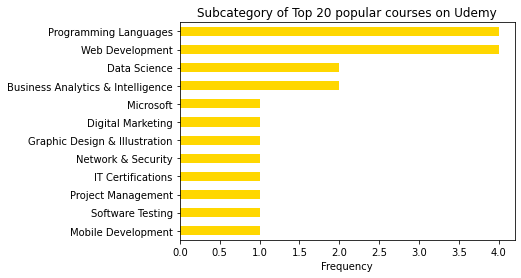

In [39]:
ax['Subcategory'].value_counts().plot(kind='barh', color='gold')
plt.gca().invert_yaxis()
plt.xlabel('Frequency')
plt.title('Subcategory of Top 20 popular courses on Udemy')

And the last graph show skills offered by top 20 popular courses on Udemy.

As you can see, If we are online learning provider on Udemy, We should highlight more on Programming, Software, and Business courses due to <br>
number of interested learners.

---

> # End